In [1]:
%matplotlib widget
import matplotlib.pylab as plt
import numpy as np

In [2]:
import pandas as pd

# Load data

In [3]:
m4 = pd.read_csv('data/m4_gaia.csv')

In [4]:
m4.describe()

,Unnamed: 0,source_id,ra,dec,l,b,ecl_lon,ecl_lat,parallax,pmra,...,ruwe,bp_g,bp_rp,g_rp,phot_bp_mean_flux,phot_g_mean_flux,phot_rp_mean_flux,radial_velocity,ref_epoch,member
count,99850.000000,9.985000e+04,99850.000000,99850.000000,99850.000000,99850.000000,99850.000000,99850.000000,79653.000000,79653.000000,...,79653.000000,89962.000000,89899.000000,90300.000000,8.996200e+04,9.956400e+04,9.049000e+04,1449.000000,99850.0,99850.000000
mean,49924.500000,6.045830e+18,245.914067,-26.528108,350.981788,15.958832,248.502523,-4.868765,0.408147,-6.540688,...,1.068694,0.604393,1.483782,0.880217,1.397852e+03,3.136829e+03,3.136992e+03,6.957770,2016.0,0.205108
std,28824.356526,9.963159e+14,0.258359,0.236738,0.245348,0.232020,0.231596,0.237125,0.902885,5.989754,...,0.417629,0.353142,0.385789,0.286670,3.611975e+04,6.427996e+04,5.247220e+04,67.365492,0.0,0.403782
min,0.000000,6.045303e+18,245.276123,-27.080576,350.395388,15.416668,247.929879,-5.423753,-16.928227,-233.286771,...,0.726027,-4.300440,-3.818037,-1.845182,1.916297e+00,2.759072e+01,5.029099e+00,-252.885590,2016.0,0.000000
25%,24962.250000,6.045445e+18,245.760314,-26.674508,350.833632,15.813383,248.364567,-5.014521,0.085481,-12.235650,...,0.989939,0.498642,1.276926,0.732193,5.157772e+01,1.183844e+02,1.162761e+02,-37.657660,2016.0,0.000000
50%,49924.500000,6.045466e+18,245.905172,-26.526549,350.978051,15.965093,248.494908,-4.868546,0.428692,-5.719970,...,1.018560,0.617987,1.427523,0.817494,1.038392e+02,2.626631e+02,2.582487e+02,6.439250,2016.0,0.000000
75%,74886.750000,6.045495e+18,246.075942,-26.382588,351.135490,16.095441,248.648259,-4.722161,0.690383,-2.145890,...,1.052123,0.759015,1.660256,0.957817,3.827595e+02,8.702170e+02,8.668291e+02,68.524340,2016.0,0.000000
max,99849.000000,6.048530e+18,246.516653,-25.970427,351.549913,16.527642,249.043548,-4.313491,18.876288,70.301483,...,24.191168,3.468922,5.883408,5.970175,7.580327e+06,1.148564e+07,6.568292e+06,348.186000,2016.0,1.000000


In [5]:
pmra = -12.513
pmdec = -19.009
parallax = 0.53543

# select stars in circle
def in_circle(center_x, center_y, radius, x, y):
    square_dist = (center_x - x) ** 2 + (center_y - y) ** 2
    return square_dist <= (radius) ** 2

# select stars within 1.5mas of M4's PM
pm_mask = in_circle(pmra,pmdec,1.5,m4['pmra'],m4['pmdec'])

#select stars within 0.58 of M4's parallax
parallax_mask = (parallax-0.58254<=m4['parallax']) & (m4['parallax']<=parallax+0.58254)

members_mask = pm_mask & parallax_mask

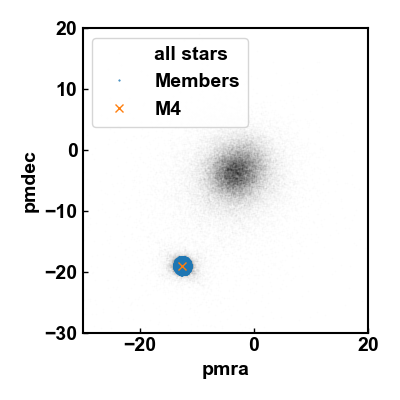

In [6]:
plt.figure(figsize=(4,4))
plt.plot(m4['pmra'],m4['pmdec'],'.',color='k',alpha=0.01,ms=1,label='all stars')
plt.plot(m4['pmra'][members_mask],m4['pmdec'][members_mask],'.',alpha=1,ms=1,label='Members')
plt.plot(pmra,pmdec,'x',label='M4')
plt.legend()
plt.ylim(-30,20)
plt.xlim(-30,20)
plt.ylabel('pmdec')
plt.xlabel('pmra')
plt.tight_layout()


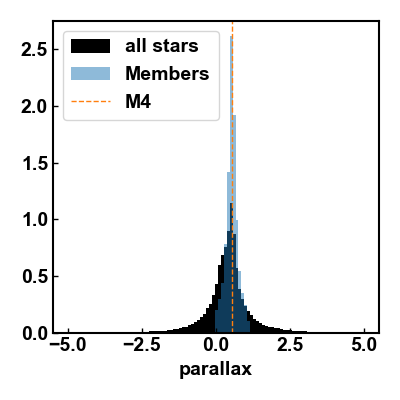

In [7]:
bins=np.linspace(-5,5,100)

plt.figure(figsize=(4,4))
plt.hist(m4['parallax'],label='all stars',density=True,bins=bins,color='k')
plt.hist(m4['parallax'][members_mask],label='Members',density=True,bins=bins,alpha=0.5)
plt.axvline(parallax,ls='--',lw=1,label='M4',color='tab:orange')
plt.legend()
plt.xlabel('parallax')
plt.tight_layout()

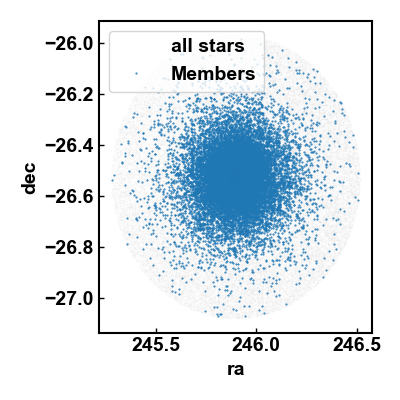

In [8]:
plt.figure(figsize=(4,4))
plt.plot(m4['ra'],m4['dec'],'.',color='k',alpha=0.01,ms=1,label='all stars')
plt.plot(m4['ra'][members_mask],m4['dec'][members_mask],'.',alpha=1,ms=1,label='Members')
plt.legend()
plt.ylabel('dec')
plt.xlabel('ra')
plt.tight_layout()


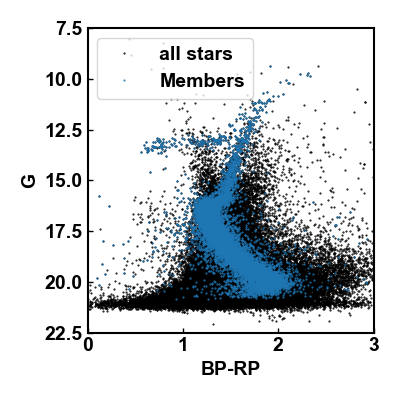

In [9]:
plt.figure(figsize=(4,4))
plt.plot(m4['bp_rp'],m4['phot_g_mean_mag'],'.',color='k',alpha=1,ms=1,label='all stars')
plt.plot(m4['bp_rp'][members_mask],m4['phot_g_mean_mag'][members_mask],'.',alpha=1,ms=1,label='Members')
plt.legend()
plt.ylim(22.5,7.5)
plt.xlim(0,3)
plt.ylabel('G')
plt.xlabel('BP-RP')
plt.tight_layout()

In [10]:
m4['member'] = members_mask

In [11]:
m4.to_csv('data/m4_gaia.csv')

In [12]:
plt.close('all')